### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv("vehicle.csv")
dataframeNona = dataframe.dropna() # drop NA values
dataframeNona.isna().sum() # Checking if NA values are dropped

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [2]:
print(dataframeNona["class"].value_counts())
# Take away : There are more number of data points available for car class.

car    413
bus    205
van    195
Name: class, dtype: int64


### Check for any missing values in the data 

In [3]:
print(dataframeNona.isnull().sum()) # Since we have dropped the na values, just checking the there are no null / blank values.
print(dataframeNona.describe().transpose())  # to check the count of data points in each column / feature is same after dropping missing values.
dataframeNona.info() # checking data type of each feature

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64
                             count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.6154

In [4]:
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# plotting the data to understand the if we can visully any further clusters within cars category
sns.pairplot(dataframeNona, diag_kind='kde' , hue = 'class') 

# Takeaway : Visually we can see distinguishing peaks in cars for these features : Compactness,circularity, distance_circularity, 
# radius_ratio,scatter ratio, pr.axis_rectangularity, max.length_rectangularity,scaled_variance,scaled_variance.1,hollows_ratio,
# scaled_radius_of_gyration,skewness_about.1. This indicates there are further clusters within cars.

### 3. Standardize the data 

In [5]:
#Before standardising data , convert class feature to a numeric variable using label encoding method. 
from sklearn.preprocessing import LabelEncoder
dataframeNona["class"] = LabelEncoder().fit_transform(dataframeNona["class"]) # converted to numeric values

from scipy.stats import zscore 
dataframeNona_z = dataframeNona.apply(zscore) # converting to Z score
dataframeNona_z.head(10)


C:\Users\Aadee\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,1.443415
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,1.443415
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,0.017538
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,1.443415
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,-1.408339
6,0.406283,-0.293543,-0.573312,0.116137,0.404751,-0.556023,-0.470734,0.129648,-0.606014,-0.337462,-0.397397,-0.441776,-0.069700,-0.856567,1.351690,-1.310052,1.792048,1.118521,-1.408339
7,-0.444400,-0.293543,-1.017098,-0.360128,0.404751,0.085785,-0.954676,0.899019,-0.994877,-0.130505,-0.846883,-0.898494,-0.317284,-0.722724,-0.681472,-1.085874,0.653818,0.848040,1.443415
8,-0.930504,-1.758654,-1.270690,-0.866160,-0.097251,-0.342087,-1.408372,1.668390,-1.383740,-1.441236,-1.521112,-1.229615,-1.926579,-1.124255,-0.884788,0.147109,1.792048,1.659484,1.443415
10,-0.930504,-1.433074,-0.763506,-0.776860,-0.097251,0.085785,-1.075662,1.155476,-0.994877,-1.234278,-1.135838,-0.984129,-1.462359,-0.856567,-0.884788,-0.301249,0.816422,0.848040,1.443415
11,-0.444400,-1.758654,-1.017098,-0.985226,-0.850254,-0.556023,-1.378125,1.668390,-1.383740,-2.062109,-1.296369,-1.223906,-1.740891,-0.990411,-0.274839,1.492180,1.141631,0.848040,0.017538


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [6]:
# creating empty array 

distortion = []
distortion

[]

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [7]:
# Import Linear Regression machine learning library
from sklearn.cluster import KMeans
from sklearn import metrics

cluster_range = range( 2, 10)   
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(dataframeNona_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  distortion.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(dataframeNona_z, labels, metric='euclidean')) # getting silhoutte score

# combine the cluster_range and cluster_errors into a dataframe 
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": distortion , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:20]

,num_clusters,cluster_errors,Avg Sil Score
0,2,9415.219195,0.369404
1,3,7832.622405,0.273652
2,4,7174.742551,0.285380
3,5,5881.285480,0.258290
4,6,5413.908582,0.241546
5,7,4953.744757,0.246309
6,8,4562.630581,0.240129
7,9,4228.245564,0.247106


Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

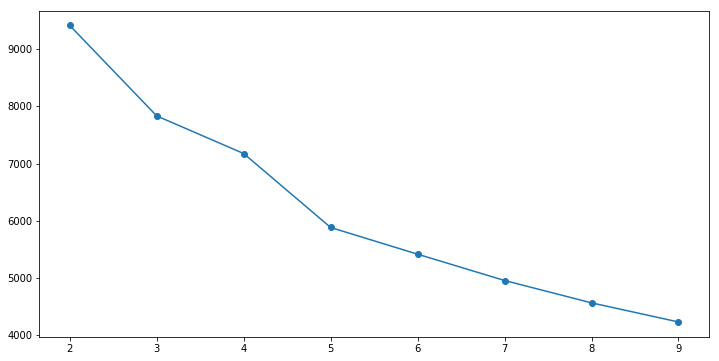

In [8]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [9]:
# At k=  5 or 6 we see a sudden drop in distortion.Choosing 5 as the optimal value of k.

cluster = KMeans( n_clusters = 5, random_state = 1 )
cluster.fit(dataframeNona_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [10]:

centroids = cluster.cluster_centers_
centroids

array([[-0.37775652, -0.42482526, -0.42674627, -0.6205056 , -0.184292  ,
         0.02827523, -0.75531043,  0.76665403, -0.72100016, -0.19578155,
        -0.77921856, -0.74677647, -0.51079174, -0.41905651,  0.02139003,
        -0.29944069,  0.31374719,  0.40232779,  1.19810328],
       [-0.07556816, -0.46935625, -0.12445354,  0.35233508,  0.35266801,
        -0.25651258, -0.11927184, -0.11719185, -0.18993057, -0.54441974,
        -0.04647728, -0.15104561, -0.47542783, -0.57148014, -0.16199897,
         0.18129581,  0.87739873,  0.6451792 , -0.60271803],
       [ 1.20466313,  1.25055949,  1.26416134,  0.97786094,  0.06955316,
         0.24736517,  1.35910624, -1.25110771,  1.37275667,  1.16945671,
         1.25315582,  1.37454824,  1.16417218, -0.08400066,  0.18240746,
         0.27102163, -0.05423185,  0.17411962, -0.21108316],
       [-1.06738804, -0.68173478, -1.06133713, -1.15597519, -0.59028904,
        -0.45140585, -0.84332972,  0.95397398, -0.81753813, -0.73697367,
        -0.859

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [11]:
centroid_df = pd.DataFrame(centroids, columns = list(dataframeNona_z) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,-0.377757,-0.424825,-0.426746,-0.620506,-0.184292,0.028275,-0.755310,0.766654,-0.721000,-0.195782,-0.779219,-0.746776,-0.510792,-0.419057,0.021390,-0.299441,0.313747,0.402328,1.198103
1,-0.075568,-0.469356,-0.124454,0.352335,0.352668,-0.256513,-0.119272,-0.117192,-0.189931,-0.544420,-0.046477,-0.151046,-0.475428,-0.571480,-0.161999,0.181296,0.877399,0.645179,-0.602718
2,1.204663,1.250559,1.264161,0.977861,0.069553,0.247365,1.359106,-1.251108,1.372757,1.169457,1.253156,1.374548,1.164172,-0.084001,0.182407,0.271022,-0.054232,0.174120,-0.211083
3,-1.067388,-0.681735,-1.061337,-1.155975,-0.590289,-0.451406,-0.843330,0.953974,-0.817538,-0.736974,-0.859055,-0.834911,-0.480866,0.947382,-0.069289,-0.235966,-1.183076,-1.326956,-0.319345
4,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651,0.730477


Hint: Use pd.Dataframe function 

In [12]:
prediction=cluster.predict(dataframeNona_z)
dataframeNona_z["GROUP"] = prediction


dataframeNona_z.groupby("GROUP").count()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
GROUP,,,,,,,,,,,,,,,,,,,
0,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186,186
1,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
2,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237
3,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182
4,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025942B7AFD0>,
      dtype=object)

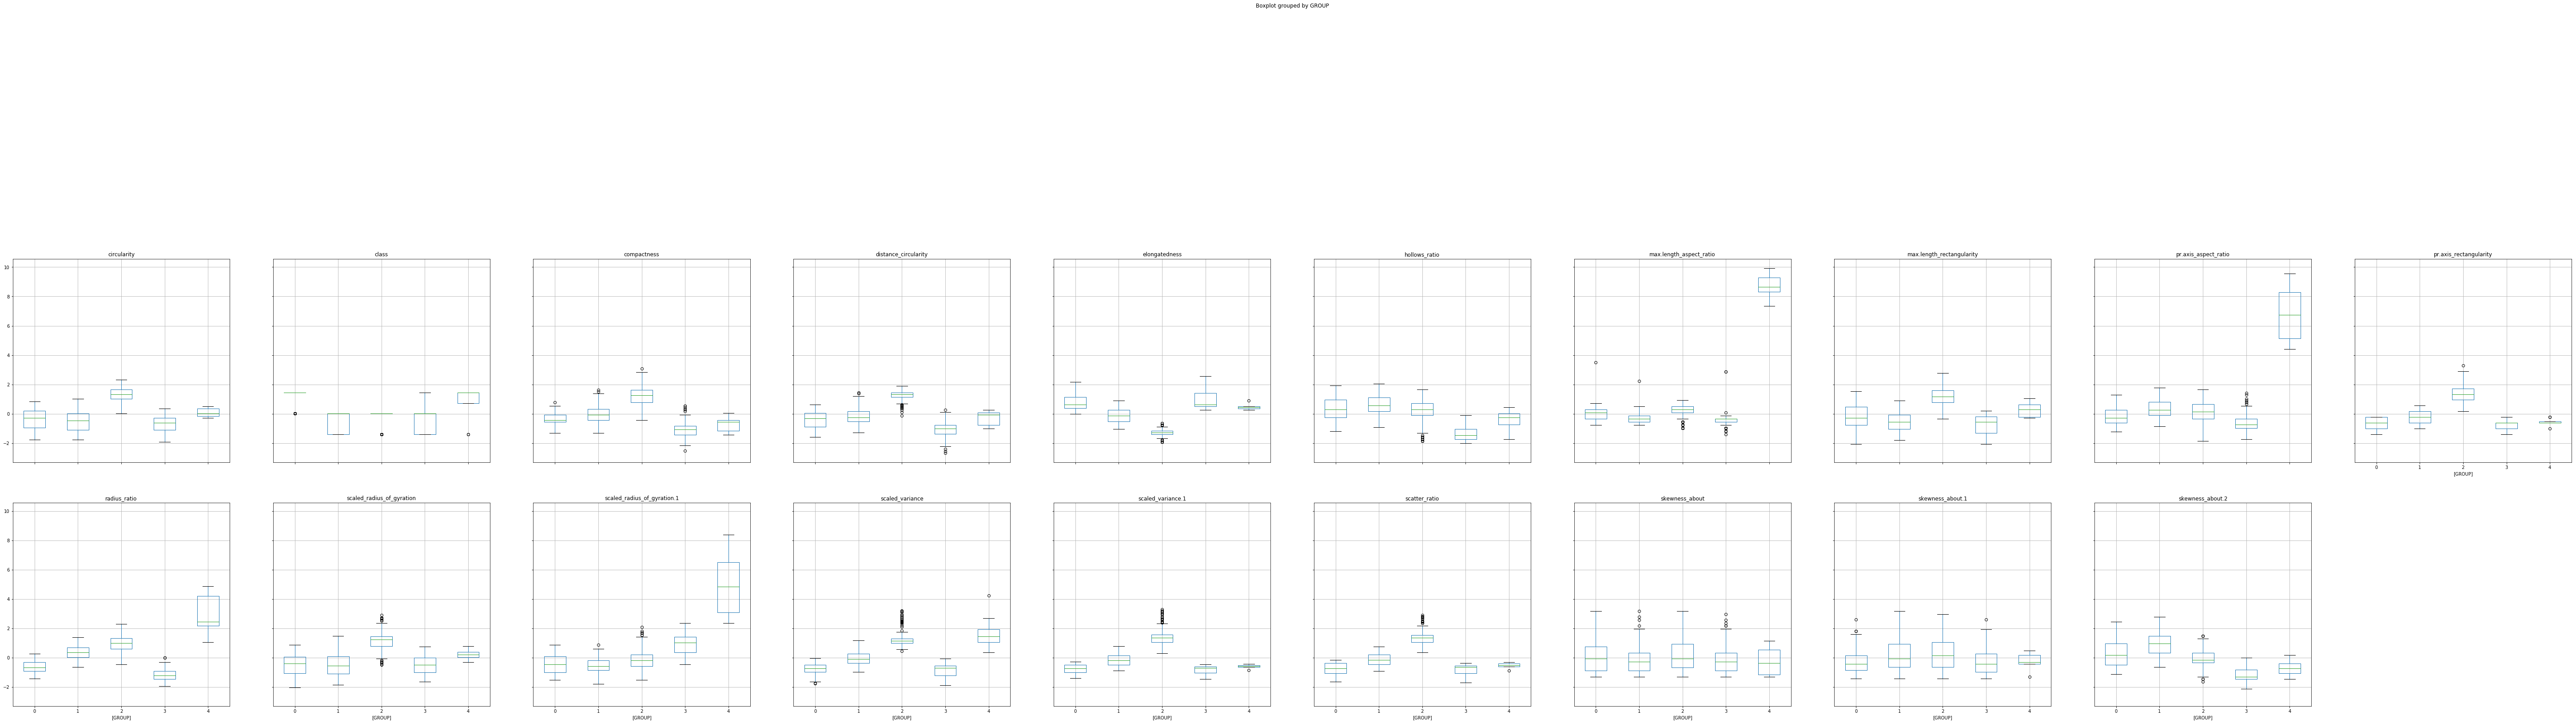

In [13]:
import matplotlib.pylab as plt

dataframeNona_z.boxplot(by = 'GROUP',  layout=(10,10), figsize=(100, 100))

# we are not seeing farthest & tighest clusters. There is lot of overlap.

### Use kmeans.labels_ function to print out the labels of the classes

In [14]:
# Printing labels assigned to each class

labels = cluster.labels_
labels


array([0, 0, 2, 0, 4, 1, 0, 0, 0, 0, 1, 0, 1, 2, 3, 1, 2, 3, 3, 1, 1, 2,
       0, 3, 2, 1, 3, 0, 0, 0, 2, 1, 3, 4, 2, 3, 2, 3, 0, 1, 2, 0, 0, 3,
       0, 1, 3, 1, 2, 1, 2, 0, 1, 0, 2, 3, 2, 3, 3, 3, 1, 3, 2, 0, 2, 2,
       1, 3, 0, 2, 1, 3, 3, 2, 0, 3, 1, 2, 0, 3, 1, 3, 2, 1, 2, 0, 3, 2,
       3, 3, 2, 3, 4, 0, 0, 0, 1, 2, 3, 3, 1, 0, 0, 3, 3, 0, 0, 2, 2, 1,
       3, 0, 0, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 3, 2, 4, 0, 0, 3, 0, 1, 2,
       3, 1, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 0, 1, 3, 2, 1, 0, 2, 2,
       1, 2, 3, 3, 2, 2, 0, 2, 0, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 1, 1, 2,
       1, 1, 0, 2, 1, 3, 2, 3, 3, 3, 0, 1, 2, 2, 0, 0, 1, 3, 2, 1, 0, 1,
       2, 3, 3, 2, 3, 0, 2, 0, 3, 3, 0, 2, 0, 2, 3, 3, 3, 3, 2, 0, 0, 1,
       2, 3, 1, 1, 3, 2, 0, 3, 1, 1, 2, 3, 2, 0, 1, 0, 2, 1, 1, 2, 2, 3,
       1, 0, 0, 2, 3, 1, 0, 3, 3, 1, 0, 2, 1, 3, 3, 2, 1, 1, 3, 3, 2, 0,
       1, 2, 3, 0, 4, 1, 0, 2, 1, 2, 3, 1, 1, 2, 0, 1, 0, 3, 1, 2, 2, 2,
       2, 0, 3, 2, 3, 3, 0, 1, 3, 2, 2, 3, 2, 1, 3,

In [ ]:
# Conclusion : either the provided data set didnt have enough features to segregate further clusters within car cluster 
# or the provided dataset doesnt have enough data points that are very different from each for given features. 

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [15]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

z = np.concatenate((a,b,c), axis = 0)


### 9. Combine all three arrays a,b,c into a dataframe

In [16]:
dataset = pd.DataFrame(z, columns = ['col1','col2'])
print(dataset.head(10))
print(dataset.shape)

        col1      col2
0  11.801011  1.567319
1  12.713614  0.173795
2   8.531144 -2.700657
3  10.077464 -3.696562
4  11.851491 -0.837945
5  11.346663  0.345138
6   9.384580 -0.748231
7  10.556255 -1.241403
8   9.901424 -0.531254
9  11.168927  2.568518
(250, 2)


### 10. Use scatter matrix to print all the 3 distributions

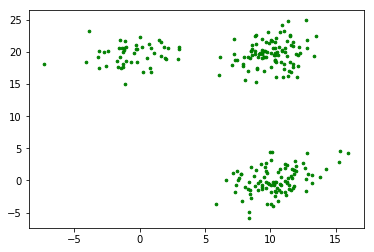

In [17]:
from matplotlib import pyplot as plt

f1 = dataset['col1'].values

f2 = dataset['col2'].values

plt.scatter(f1, f2, c='green', s=7)

### 11. Find out the linkage matrix

Use ward as linkage metric and distance as Eucledian

In [18]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model.fit(dataset)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

### 12. Plot the dendrogram for the consolidated dataframe

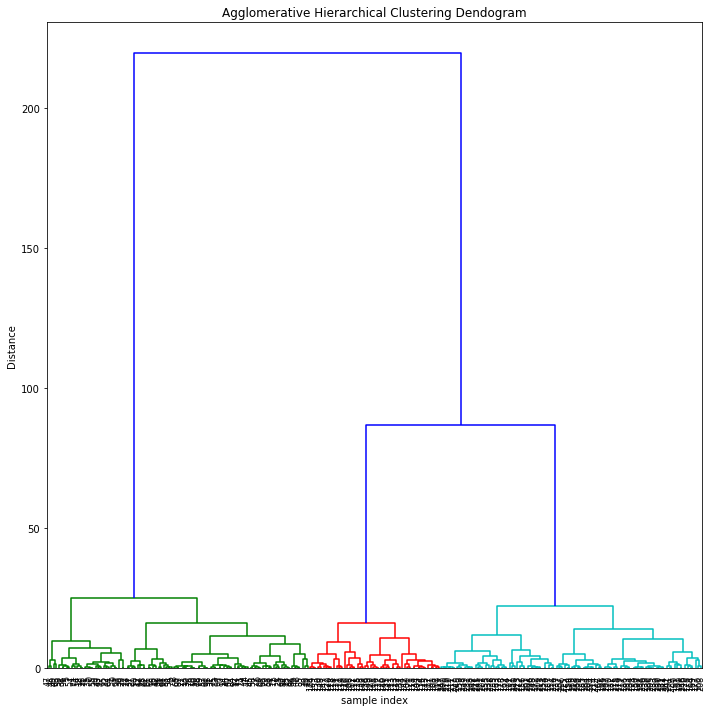

In [19]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage


Z = linkage(dataset, 'ward')
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

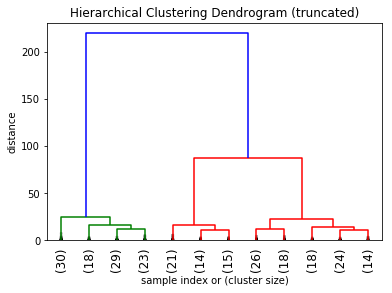

In [20]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [21]:
# From the above diagram we can see that there is a huge jump is distance if we have a cut off at 100.
# with cut off at 100, we see 2 clusters. 



### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [22]:

from scipy.cluster.hierarchy import fcluster
max_d = 50 # cut off at 50 to see 3 different clusters.
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

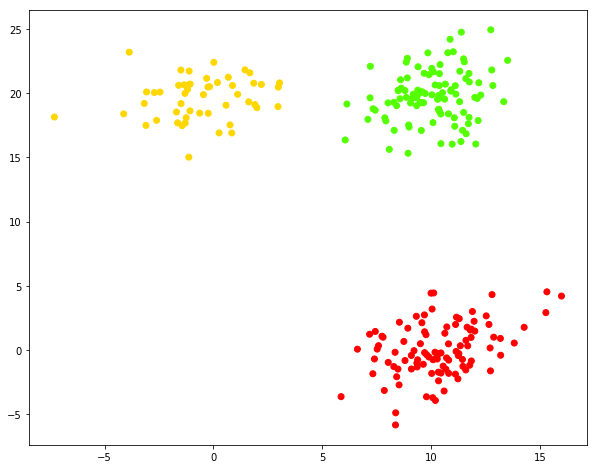

In [23]:
plt.figure(figsize=(10, 8))
plt.scatter(f1,f2, c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

